<a href="https://colab.research.google.com/github/mattbobea/AI_in_Business_Application/blob/main/First_Neural%20_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **## First Neural Network ## Hands on digit recognition**

In [ ]:
# Not a required step for this project. Just for teaching demonstration of the image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Understanding the Problem**

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


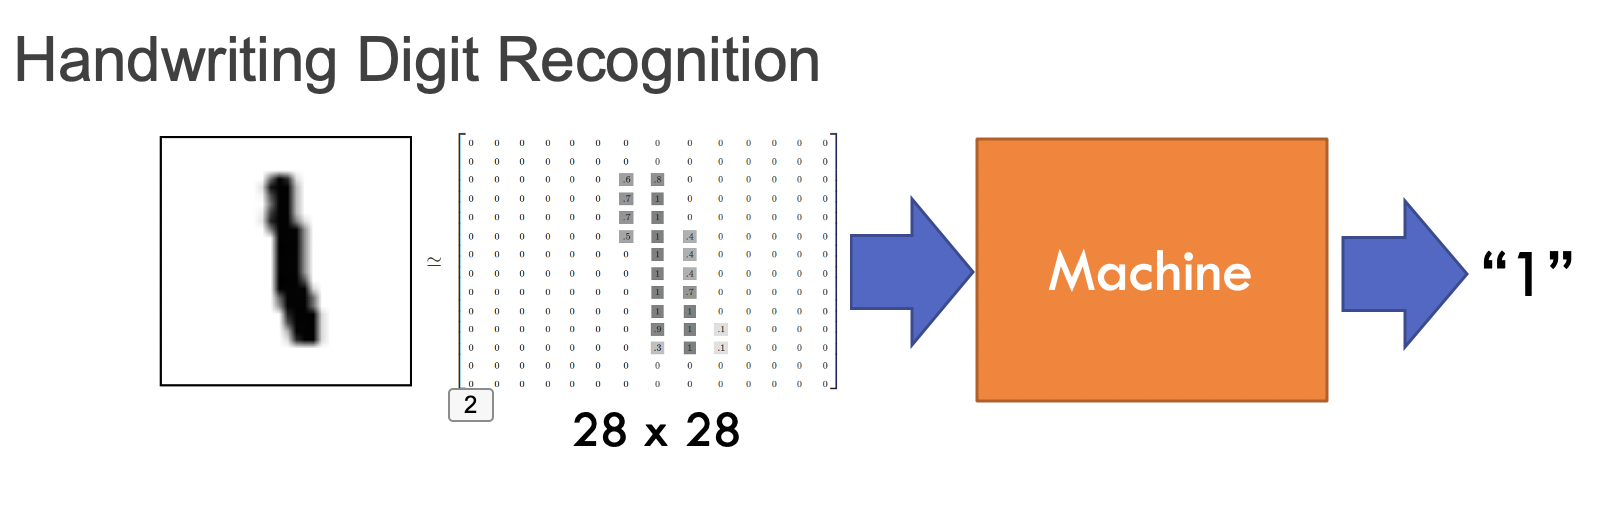

In [ ]:
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('mnist_process.png')

# **Neural Network Pipeline**

### **Step 0: Preperation**
> **step 0-1: Import Package**

> **step 0-2: Import Dataset**

> **step 0-3: Take a look at data**

> **step 0-4: Data Preprocessing: standardize for input**

> **step 0-5: Data Preprocessing: one-hot encoding for output**


### **Step 1: Build a function (Neural Network)**

> **step 1-1: Import Package regarding NN**

> **step 1-2: What's our NN look like? Build it!**

### **Step 2: Goodness of function**

> **step 2-1: Compile**

> **step 2-2: Check our NN structure**

### **Step 3: Choose the best function**

> **step 3-1: Traing! Find the optimal network parameters**

> **step 3-2: Save & Load NN Model**

> **step 3-3: Testing**



# **Step 0: Preperation**

In [ ]:
# This block is for teaching purpose (gif), nothing do with neural network
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

# **step 0-1: Import Package**

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # excel like data form

# **step 0-2: Import Dataset**

### **About the dataset MNIST**

* Collect digits written by high school students

* The MNIST database contains 60,000 training images and 10,000 testing images.

* Geoffrey Hinton called MNIST "the fruit fly of machine learning"

* Collected by Yann LeCun ref: http://yann.lecun.com/exdb/mnist/

* Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [ ]:
# load dataset from keras.datasets
# lots of good package for deep learning are within keras
from keras.datasets import mnist

In [ ]:
# please save the data into the variable we named here
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# Return
# x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).  
# y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
# training: 60,000; test: 10,000 collecting by Yann LeCun

# **step 0-3: Take a look at data**

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
# choose one of the data to see what's inside

n = 8888 # choose any number in 0-59999
X = x_train[n]

In [ ]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 192, 254, 254, 254, 254, 254,
        174,  80,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X.shape

(28, 28)

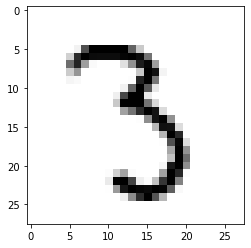

In [ ]:
plt.imshow(X, cmap='Greys')
# plt.imshow is short from matplotlib.pyplot.imshow 
# plt.imshow displat data as an image
# cmap 
# grey is british spelling for gray, s might means sequential dark/light?

In [ ]:
y_train[n]

3

# **step 0-4: Data Preprocessing: standardize for input**

### **Also called normalization**
### **Also called feature scaling, a good habit**

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


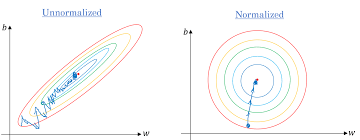

In [ ]:
from IPython.display import Image
#/%cd /content/drive/My\ Drive/AI_Biz_Demo/AI_Biz_Demo_img
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('Feature_Scaling2.png')

In [ ]:
# Standardize by dividing the max value 255 (1-256 in python 0-255)
x_train = x_train/255
x_test = x_test/255

In [ ]:
X = x_train[n]
X

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

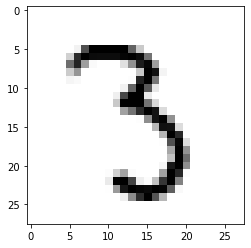

In [ ]:
X = x_train[n]
plt.imshow(X, cmap='Greys')

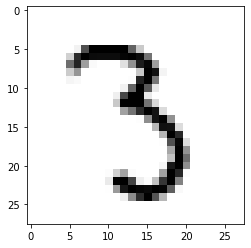

In [ ]:
# why normalized won't change greyschale
plt.imshow(x_train[n], cmap='Greys')


# **step 0-5: Data Preprocessing: one-hot encoding for output**

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


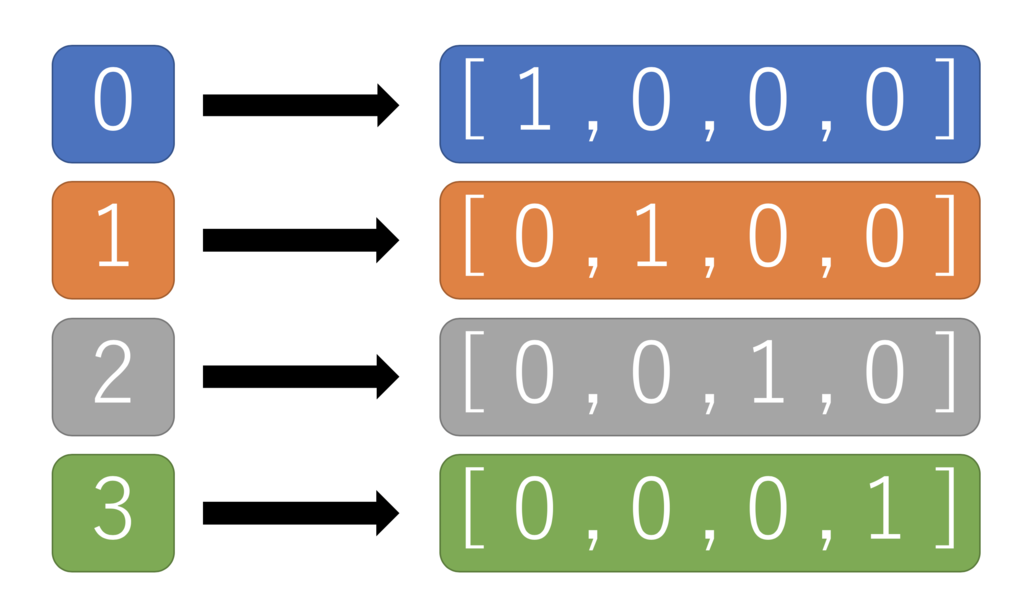

In [ ]:
from IPython.display import Image
#/%cd /content/drive/My\ Drive/AI_Biz_Demo/AI_Biz_Demo_img
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('onehot_num_4dim.png')

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


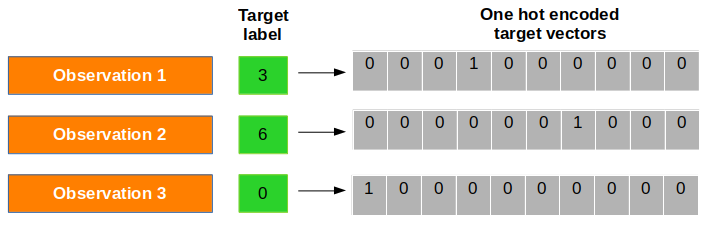

In [ ]:
from IPython.display import Image
#/%cd /content/drive/My\ Drive/AI_Biz_Demo/AI_Biz_Demo_img
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('onehot_num_10dim.png')

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
y_train[n]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Step 1: Build a function (Neural Network)**


# **step 1-1: Import Package regarding NN**



In [ ]:
from keras.models import Sequential
# add a layer sequentially
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
# to find the best answer with SGD
# SGD = stochastic graident decent

# **step 1-2: What's our NN look like? Build it!**

In [ ]:
# Announce a model
mymodel = Sequential()
# i called it "mymodel"

In [ ]:
# Input Layer
# Starting to add layer
mymodel.add(Flatten(input_shape = (28,28)))
# flatten the matrix image into long vector

In [ ]:
# Add 1st hidden layer
mymodel.add(Dense(28,activation='relu'))

In [ ]:
# Add 2nd hidden layer
mymodel.add(Dense(14,activation='relu'))

In [ ]:
# The output layer have ten different digits, also due to one-hot encoding/label encoding, 
# the output layer have 10 dimensions/10 neurons.

mymodel.add(Dense(10,activation='softmax'))
# softmax for probability (for classification problem)

In [ ]:
# The output layer have ten different digits, also due to one-hot encoding/label encoding, 
# the output layer have 10 dimensions/10 neurons.


**The reason why we choose softmax:**

* we want the output can be in the form of "confidence/probability of each digits".

* Which means the total probabilities for each digits should be 1.

* In math, if we have $(y_1,y_2,...,y_{10})$, after going through softmax $s(*)$, $(s(y_1),s(y_2),...,s(y_{10}))$ have the properties that 

$\sum_{i=1}^{i=10}s(y_i)=1$ i.e. probability summation equals 1.


### **Why compile?**
### One thing different from previous machine learning model (eg, regression, kmeans), we would need to do an extra step "compile" to finish building an neural network.

1. Decide how to define the difference between our prediction adn correct answer i.e. loss function
2. Decide how to find the best function, i.e. optimizer, here we use stochstic gradient descent (SGD)
3. We also set the learning rate for SGD as lr=0.087 (you can change and play with it)
4. In order to know if we are improved during training, we add a metrics=['accuracy'] 


In [ ]:
mymodel.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# 'adam' makes the training more stable: 
# Adaptive Moment Estimation (Adam) leverages the power of adaptive learning rates methods 
# to find individual learning rates for each parameter

In [ ]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 14)                406       
                                                                 
 dense_2 (Dense)             (None, 10)                150       
                                                                 
Total params: 22,536
Trainable params: 22,536
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*28 + 28

21980

In [ ]:
28*14 + 14

406

In [ ]:
28*2+2

58

In [ ]:
2*10 + 10

30

### **Step 3: Choose the best function**

> **step 3-1: Traing! Find the optimal network parameters**

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


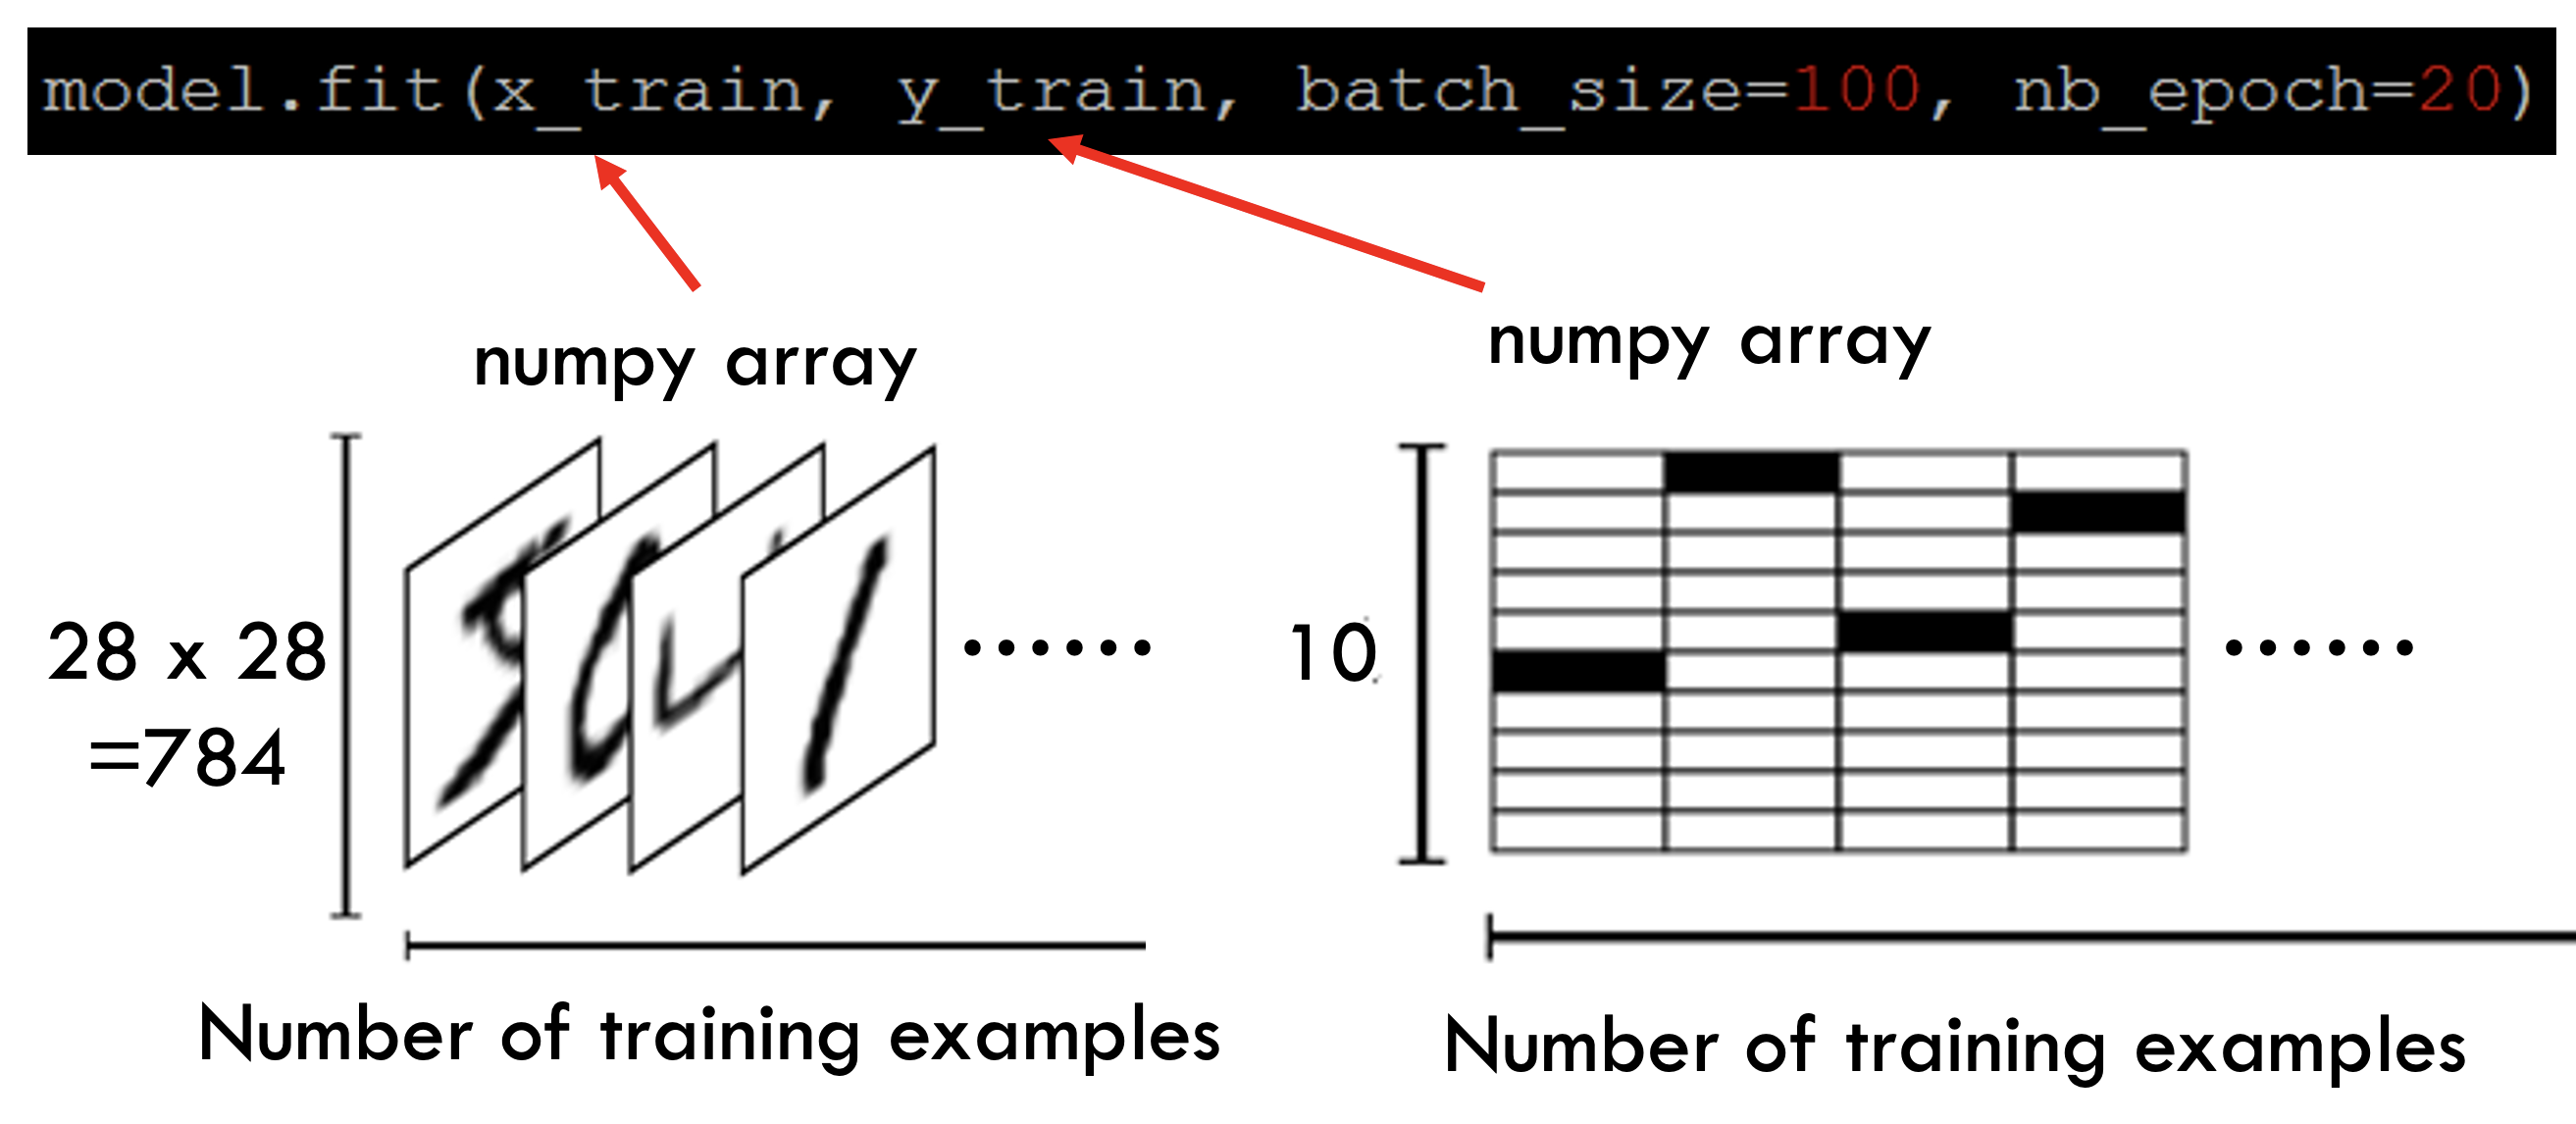

In [ ]:
from IPython.display import Image
#/%cd /content/drive/My\ Drive/AI_Biz_Demo/AI_Biz_Demo_img
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('NN_model_fit.png')

In [ ]:
# The actual training stage, takes time!

training_result = mymodel.fit(x_train, y_train, batch_size=100, epochs=20,  validation_split=0.2)

# batch size = the number of training examples in one forward/backward pass.

# The higher the batch size, the more memory space you'll need.

# epochs: see all the data once

Epoch 1/20
480/480 [==============================] - 2s 2ms/step - loss: 0.6151 - accuracy: 0.8156 - val_loss: 0.2794 - val_accuracy: 0.9209
Epoch 2/20
480/480 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.9272 - val_loss: 0.2244 - val_accuracy: 0.9393
Epoch 3/20
480/480 [==============================] - 1s 2ms/step - loss: 0.1994 - accuracy: 0.9429 - val_loss: 0.1898 - val_accuracy: 0.9477
Epoch 4/20
480/480 [==============================] - 1s 2ms/step - loss: 0.1717 - accuracy: 0.9506 - val_loss: 0.1745 - val_accuracy: 0.9491
Epoch 5/20
480/480 [==============================] - 1s 2ms/step - loss: 0.1507 - accuracy: 0.9556 - val_loss: 0.1674 - val_accuracy: 0.9537
Epoch 6/20
480/480 [==============================] - 1s 2ms/step - loss: 0.1368 - accuracy: 0.9601 - val_loss: 0.1523 - val_accuracy: 0.9562
Epoch 7/20
480/480 [==============================] - 1s 2ms/step - loss: 0.1250 - accuracy: 0.9638 - val_loss: 0.1429 - val_accuracy: 0.9608
Epoch 

In [ ]:
print(training_result.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

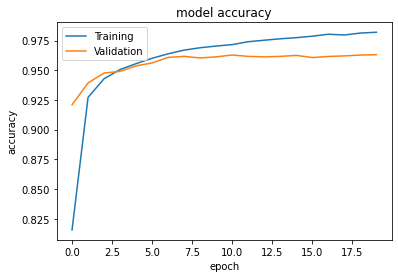

In [ ]:
# summarize training for accuracy
plt.plot(training_result.history['accuracy'])
plt.plot(training_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

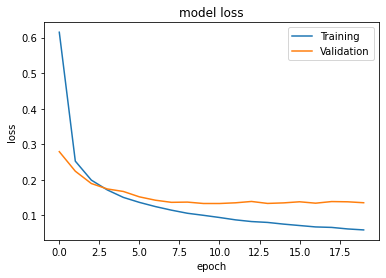

In [ ]:
# summarize traning for loss
plt.plot(training_result.history['loss'])
plt.plot(training_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = mymodel.evaluate(x_test, y_test)
print('Testing Set accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.9645
Testing Set accuracy: 0.9645000100135803


In [ ]:
from ipywidgets import interact_manual

In [ ]:
predict = mymodel.predict(x_test) 
classes = np.argmax(predict,axis=1)

313/313 [==============================] - 0s 928us/step


In [ ]:
classes[1234] 

8

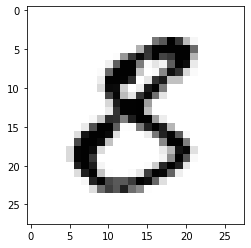

In [ ]:
plt.imshow(x_test[1234], cmap='Greys')

In [ ]:
def test(testing_num):
    plt.imshow(x_test[testing_num], cmap='Greys')
    print("My First NN prediction is:", classes[testing_num]) # starting 2021 fall
    #print("My First NN prediction is:", predict[testing_num]) # 2021 spring works

My First NN prediction is: 9


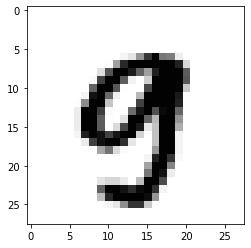

In [ ]:
test(4321)

In [ ]:
interact_manual(test, testing_num=(0, 9999))

interactive(children=(IntSlider(value=4999, description='testing_num', max=9999), Button(description='Run Inte…

<function __main__.test(testing_num)>

# **How to Improve Accuracy?**

# **Improved Model: Dropout Mechnism**

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


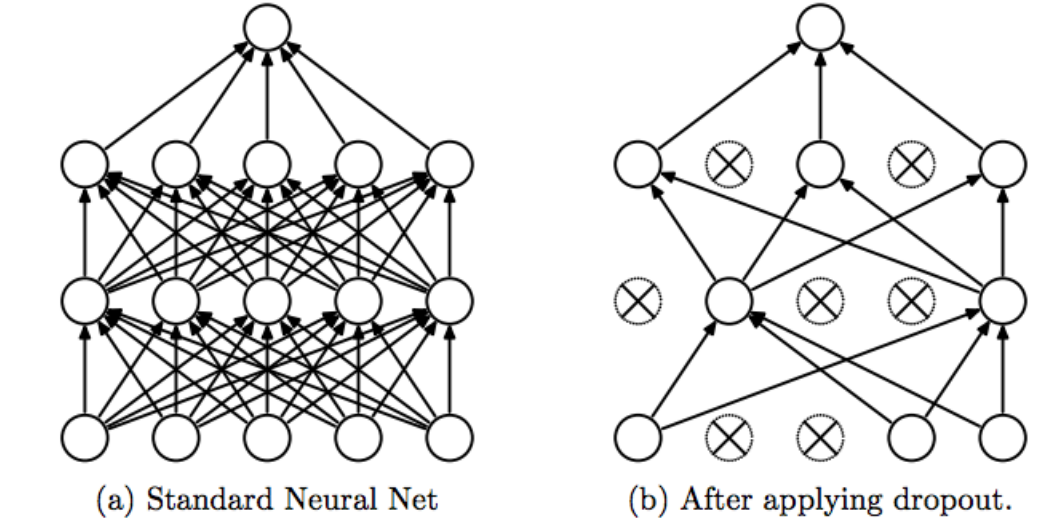

In [ ]:
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('DropoutNN.png')

In [ ]:
# import package for dropout
from keras.layers import Dropout

# Similar step
mymodel_improved = Sequential()
mymodel_improved.add(Flatten(input_shape = (28, 28)))
#Adding a dropout layer to avoid the overfitting
mymodel_improved.add(Dropout(0.3)) # try 30% of the neurons dropout
mymodel_improved.add(Dense(28,activation='relu'))
mymodel_improved.add(Dense(14,activation='relu'))
#Adding a dropout layer to avoid the overfitting
mymodel_improved.add(Dropout(0.3)) # try 30% of the neurons dropout
mymodel_improved.add(Dense(10,activation='softmax'))
mymodel_improved.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
mymodel_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 28)                21980     
                                                                 
 dense_4 (Dense)             (None, 14)                406       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                150       
                                                                 
Total params: 22,536
Trainable params: 22,536
Non-trai

In [ ]:
training_result_improved = mymodel_improved.fit(x_train, y_train, batch_size=100, epochs=20,  validation_split=0.2)

Epoch 1/20
480/480 [==============================] - 2s 3ms/step - loss: 1.1311 - accuracy: 0.6084 - val_loss: 0.4194 - val_accuracy: 0.8953
Epoch 2/20
480/480 [==============================] - 1s 3ms/step - loss: 0.7027 - accuracy: 0.7615 - val_loss: 0.3144 - val_accuracy: 0.9147
Epoch 3/20
480/480 [==============================] - 1s 3ms/step - loss: 0.6055 - accuracy: 0.7993 - val_loss: 0.2639 - val_accuracy: 0.9258
Epoch 4/20
480/480 [==============================] - 1s 3ms/step - loss: 0.5425 - accuracy: 0.8219 - val_loss: 0.2416 - val_accuracy: 0.9332
Epoch 5/20
480/480 [==============================] - 1s 3ms/step - loss: 0.4911 - accuracy: 0.8427 - val_loss: 0.2203 - val_accuracy: 0.9358
Epoch 6/20
480/480 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.8522 - val_loss: 0.2029 - val_accuracy: 0.9418
Epoch 7/20
480/480 [==============================] - 1s 3ms/step - loss: 0.4402 - accuracy: 0.8619 - val_loss: 0.1902 - val_accuracy: 0.9452
Epoch 

Text(0.5, 1.0, 'model accuracy with Dropout')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

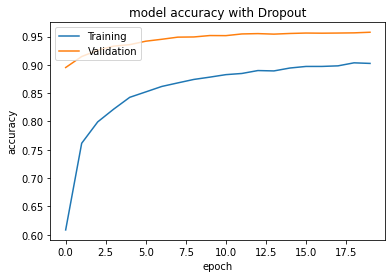

In [ ]:
# summarize training for accuracy
plt.plot(training_result_improved.history['accuracy'])
plt.plot(training_result_improved.history['val_accuracy'])
plt.title('model accuracy with Dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

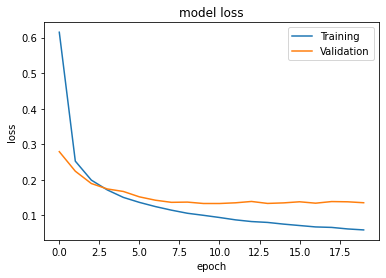

In [ ]:
# summarize traning for loss
plt.plot(training_result.history['loss'])
plt.plot(training_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = mymodel.evaluate(x_test, y_test)
print('Testing Set accuracy:', test_acc)

313/313 [==============================] - 0s 950us/step - loss: 0.1324 - accuracy: 0.9645
Testing Set accuracy: 0.9645000100135803


# **Why the accuracy is not perfect?**

1. Our neural network has limited neurons. You can increase the neuron side into 500.

2. The classical Neural Network cannot reflect the structure of an image. CNN would be a better choice. 


3. improve by optimizer, learning rate

4. improve by loss function

5. structure of NN, layer of NN